In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Index of Hydrophobicity
hydrophobicity = {"A": 0.62, "C": 0.29, "D": -0.9, "E": -0.74, "F": 1.19, "G": 0.48, "H": -0.4, "I": 1.38, "K": -1.5, "L": 1.06, "M": 0.64, 
"N": -0.78, "P": 0.12, "Q": -0.85, "R": -2.53, "S": -0.18,  "T": -0.05, "V": 1.08,  "W": 0.81, "Y": 0.26, "U": 0}

# index of hydrophilicity
hydrophilicity = {"A": -0.5, "C": -1, "D": 3, "E": 3, "F": -2.5, "G": 0, "H": -0.5, "I": -1.8, "K": 3, "L": -1.8, "M": -1.3, 
"N": 0.2, "P": 0, "Q": 0.2, "R": 3, "S": 0.3,  "T": -0.4, "V": -1.5,  "W": -3.4, "Y": -2.3, "U":0}

# index of NCI
nci = {"A": 0.007187, "C": -0.03661, "D": -0.02382, "E": 0.006802, "F": 0.037552, "G": 0.179052, "H": -0.01069, "I": 0.021631, "K": 0.017708, "L": 0.051672, "M": 0.002683, 
"N": 0.005392, "P": 0.239531, "Q": 0.049211, "R": 0.043587, "S": 0.004627,  "T": 0.003352, "V": 0.057004,  "W": 0.037977, "Y": 0.0323599, "U":0}

# index of polarity
polarity = {"A": 8.1, "C": 5.5, "D": 13, "E": 12.3, "F": 5.2, "G": 9, "H": 10.4, "I": 5.2, "K": 11.3, "L": 4.9, "M": 5.7, 
"N": 11.6, "P": 8, "Q": 10.5, "R": 10.5, "S": 9.2,  "T": 8.6, "V": 5.9,  "W": 5.4, "Y": 6.2, "U": 0}

# index of polarizability
polarizability = {"A": 0.046, "C": 0.128, "D": 0.105, "E": 0.151, "F": 0.29, "G": 0, "H": 0.23, "I": 0.186, "K": 0.219, "L": 0.186, "M": 0.221, 
"N": 0.134, "P": 0.131, "Q": 0.18, "R": 0.291, "S": 0.062,  "T": 0.108, "V": 0.14,  "W": 0.409, "Y": 0.298, "U": 0}

# index of SASA
sasa = {"A": 1.181, "C": 1.461, "D": 1.587, "E": 1.862, "F": 2.228, "G": 0.881, "H": 2.025, "I": 1.81, "K": 2.258, "L": 1.931, "M": 2.034, 
"N": 1.655, "P": 1.468, "Q": 1.932, "R": 2.56, "S": 1.298,  "T": 1.525, "V": 1.645,  "W": 2.663, "Y": 2.368, "U": 0}

# index of V
V = {"A": 27.5, "C": 44.6, "D": 40, "E": 62, "F": 115.5, "G": 0, "H": 79, "I": 93.5, "K": 100, "L": 93.5, "M": 94.1, 
"N": 58.7, "P": 41.9, "Q": 80.7, "R": 105, "S": 29.3,  "T": 51.3, "V": 71.5,  "W": 145.5, "Y": 117.3, "U": 0}

# amino_acids to numbers
res_to_num = {"A": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7, "I": 8, "K": 9, "L": 10, "M": 11, 
"N": 12, "P": 13, "Q": 14, "R": 15, "S": 16,  "T": 17, "V": 18,  "W": 19, "Y": 20}

In [3]:
df = pd.read_csv('proteins_dataframe.csv', index_col=0)
df

,pdb_id,chain_id,sequence,residue,residue_number,res_index,pdb_res_index,hydrophobicity,hydrophilicity,NCI,polarity,polarizability,SASA,vol,is_charged,tm_segment
0,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,D,3,0,5,-0.90,3.0,-0.023820,13.0,0.105,1.587,40.0,1,0
1,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,L,10,1,6,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0,0
2,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,L,10,2,7,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0,0
3,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,N,12,3,8,-0.78,0.2,0.005392,11.6,0.134,1.655,58.7,0,0
4,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,D,3,4,9,-0.90,3.0,-0.023820,13.0,0.105,1.587,40.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161310,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,V,18,211,206,1.08,-1.5,0.057004,5.9,0.140,1.645,71.5,0,0
161311,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,K,9,212,207,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1,0
161312,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,K,9,213,208,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1,0
161313,7b0o,A,LYFQGHMDRLITLVVSYSIAFSIFALATMAVVYGKWLYYFEIDFLN...,K,9,214,209,-1.50,3.0,0.017708,11.3,0.219,2.258,100.0,1,0


In [4]:
# remove sequences that are outside of membrane
seq_segm = {}

for ind in df.index:
  if df['sequence'][ind] not in seq_segm:
    seq_segm[df['sequence'][ind]] = 0
  
  seq_segm[df['sequence'][ind]] += df['tm_segment'][ind]

outside_seq = []

for key in seq_segm:
  if seq_segm[key] == 0:
    outside_seq.append(key)

df = df[~df['sequence'].isin(outside_seq)]

In [5]:
# remove sequences with length more the 800 amino acids and less than 15 residues
df = df[df['sequence'].str.len() < 800]
df = df[df['sequence'].str.len() >= 15]

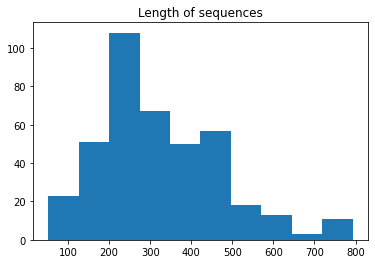

In [6]:
unique_seq = df.sequence.unique()

len_of_sequences = []
for seq in unique_seq:
  len_of_sequences.append(len(seq))

plt.hist(len_of_sequences)
plt.title("Length of sequences")
plt.show()

In [7]:
new_df = df

new_col = list(res_to_num.keys())
new_col.append("U")
new_col2 = ["avg_hydrophobicity", "avg_hydrophilicity", "avg_nci", "avg_polarity", "avg_polarizability", "avg_sasa", "avg_vol"]

columns = np.concatenate((new_col, new_col2))

i = 7
for col in columns:
  new_df.insert(i, col, np.zeros(len(new_df)))
  i+=1

In [8]:
final_df = pd.DataFrame(columns = new_df.columns)
final_df

,pdb_id,chain_id,sequence,residue,residue_number,res_index,pdb_res_index,A,C,D,...,avg_vol,hydrophobicity,hydrophilicity,NCI,polarity,polarizability,SASA,vol,is_charged,tm_segment


In [9]:
pdbs = new_df['pdb_id'].unique()

for pdb in pdbs:
  temp_df = new_df.loc[new_df['pdb_id'] == pdb].copy()
  print(pdb)
  print(len(temp_df))

  first_row = True

  for index in temp_df.index:

    if first_row:
      first_row = False

      if temp_df['res_index'][index] == 1:
        added_value = 1 
      else:
        added_value = 0

    if temp_df['res_index'][index] - added_value < 5:
      temp_df['U'][index] = 5 - temp_df['res_index'][index] + added_value

      # count the previous residues
      i = 1
      for _ in range(5 - temp_df['res_index'][index] + added_value, 5):
        temp_df[ temp_df['residue'][index-i] ][index] += 1
        temp_df['avg_hydrophobicity'][index] += hydrophobicity[temp_df['residue'][index-i]]
        temp_df['avg_hydrophilicity'][index] += hydrophilicity[temp_df['residue'][index-i]]
        temp_df['avg_nci'][index] += nci[temp_df['residue'][index-i]]
        temp_df['avg_polarity'][index] += polarity[temp_df['residue'][index-i]]
        temp_df['avg_polarizability'][index] += polarizability[temp_df['residue'][index-i]]
        temp_df['avg_sasa'][index] += sasa[temp_df['residue'][index-i]]
        temp_df['avg_vol'][index] += V[temp_df['residue'][index-i]]
        i-=1
      
      # count the next 5 residues 
      temp_df[ temp_df['residue'][index+1] ][index] += 1
      temp_df[ temp_df['residue'][index+2] ][index] += 1
      temp_df[ temp_df['residue'][index+3] ][index] += 1
      temp_df[ temp_df['residue'][index+4] ][index] += 1
      temp_df[ temp_df['residue'][index+5] ][index] += 1

      #calculate the averages
      temp_df['avg_hydrophobicity'][index] = (hydrophobicity[temp_df['residue'][index+1]] + hydrophobicity[temp_df['residue'][index+2]] + hydrophobicity[temp_df['residue'][index+3]] + hydrophobicity[temp_df['residue'][index+4]]+ hydrophobicity[temp_df['residue'][index+5]] + hydrophobicity[temp_df['residue'][index]] + temp_df['avg_hydrophobicity'][index])/(11 - 5 - temp_df['res_index'][index] + added_value)
      temp_df['avg_hydrophilicity'][index] = (hydrophilicity[temp_df['residue'][index+1]] + hydrophilicity[temp_df['residue'][index+2]] + hydrophilicity[temp_df['residue'][index+3]] + hydrophilicity[temp_df['residue'][index+4]]+ hydrophilicity[temp_df['residue'][index+5]] + hydrophilicity[temp_df['residue'][index]] + temp_df['avg_hydrophilicity'][index] )/(11 - 5 - temp_df['res_index'][index] + added_value)
      temp_df['avg_nci'][index] = (nci[temp_df['residue'][index+1]] + nci[temp_df['residue'][index+2]] + nci[temp_df['residue'][index+3]] + nci[temp_df['residue'][index+4]]+ nci[temp_df['residue'][index+5]] + nci[temp_df['residue'][index]] + temp_df['avg_nci'][index] )/(11 - 5 - temp_df['res_index'][index] + added_value)
      temp_df['avg_polarity'][index] = (polarity[temp_df['residue'][index+1]] + polarity[temp_df['residue'][index+2]] + polarity[temp_df['residue'][index+3]] + polarity[temp_df['residue'][index+4]]+ polarity[temp_df['residue'][index+5]] + polarity[temp_df['residue'][index]] + temp_df['avg_polarity'][index])/(11 - 5 - temp_df['res_index'][index] + added_value)
      temp_df['avg_polarizability'][index] = (polarizability[temp_df['residue'][index+1]] + polarizability[temp_df['residue'][index+2]] + polarizability[temp_df['residue'][index+3]] + polarizability[temp_df['residue'][index+4]]+ polarizability[temp_df['residue'][index+5]] + polarizability[temp_df['residue'][index]] + temp_df['avg_polarizability'][index])/(11 - 5 - temp_df['res_index'][index] + added_value)
      temp_df['avg_sasa'][index] = (sasa[temp_df['residue'][index+1]] + sasa[temp_df['residue'][index+2]] + sasa[temp_df['residue'][index+3]] + sasa[temp_df['residue'][index+4]]+ sasa[temp_df['residue'][index+5]] + sasa[temp_df['residue'][index]] + temp_df['avg_sasa'][index])/(11 - 5 - temp_df['res_index'][index] + added_value)
      temp_df['avg_vol'][index] = (V[temp_df['residue'][index+1]] + V[temp_df['residue'][index+2]] + V[temp_df['residue'][index+3]] + V[temp_df['residue'][index+4]]+ V[temp_df['residue'][index+5]] + V[temp_df['residue'][index]] + temp_df['avg_vol'][index])/(11 - 5 - temp_df['res_index'][index] + added_value)


    elif temp_df['res_index'][index] - added_value > len(temp_df) - 6:
      temp_df['U'][index]  = 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value)

      # count the next residues
      i = 1
      for _ in range(5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value), 5):
        temp_df[ temp_df['residue'][index+i] ][index] += 1
        temp_df['avg_hydrophobicity'][index] += hydrophobicity[temp_df['residue'][index+i]]
        temp_df['avg_hydrophilicity'][index] += hydrophilicity[temp_df['residue'][index+i]]
        temp_df['avg_nci'][index] += nci[temp_df['residue'][index+i]]
        temp_df['avg_polarity'][index] += polarity[temp_df['residue'][index+i]]
        temp_df['avg_polarizability'][index] += polarizability[temp_df['residue'][index+i]]
        temp_df['avg_sasa'][index] += sasa[temp_df['residue'][index+i]]
        temp_df['avg_vol'][index] += V[temp_df['residue'][index+i]]
        i+=1

      # count the previous 5 residues
      temp_df[ temp_df['residue'][index-1] ][index] += 1
      temp_df[ temp_df['residue'][index-2] ][index] += 1
      temp_df[ temp_df['residue'][index-3] ][index] += 1
      temp_df[ temp_df['residue'][index-4] ][index] += 1
      temp_df[ temp_df['residue'][index-5] ][index] += 1

      # calculate the averages
      temp_df['avg_hydrophobicity'][index] = (hydrophobicity[temp_df['residue'][index-1]] + hydrophobicity[temp_df['residue'][index-2]] + hydrophobicity[temp_df['residue'][index-3]] + hydrophobicity[temp_df['residue'][index-4]]+ hydrophobicity[temp_df['residue'][index-5]] + hydrophobicity[temp_df['residue'][index]] + temp_df['avg_hydrophobicity'][index])/(11- 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value))
      temp_df['avg_hydrophilicity'][index] = (hydrophilicity[temp_df['residue'][index-1]] + hydrophilicity[temp_df['residue'][index-2]] + hydrophilicity[temp_df['residue'][index-3]] + hydrophilicity[temp_df['residue'][index-4]]+ hydrophilicity[temp_df['residue'][index-5]] + hydrophilicity[temp_df['residue'][index]] + temp_df['avg_hydrophilicity'][index] )/(11- 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value))
      temp_df['avg_nci'][index] = (nci[temp_df['residue'][index-1]] + nci[temp_df['residue'][index-2]] + nci[temp_df['residue'][index-3]] + nci[temp_df['residue'][index-4]]+ nci[temp_df['residue'][index-5]] + nci[temp_df['residue'][index]] + temp_df['avg_nci'][index] )/(11- 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value))
      temp_df['avg_polarity'][index] = (polarity[temp_df['residue'][index-1]] + polarity[temp_df['residue'][index-2]] + polarity[temp_df['residue'][index-3]] + polarity[temp_df['residue'][index-4]]+ polarity[temp_df['residue'][index-5]] + polarity[temp_df['residue'][index]] + temp_df['avg_polarity'][index])/(11- 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value))
      temp_df['avg_polarizability'][index] = (polarizability[temp_df['residue'][index-1]] + polarizability[temp_df['residue'][index-2]] + polarizability[temp_df['residue'][index-3]] + polarizability[temp_df['residue'][index-4]]+ polarizability[temp_df['residue'][index-5]] + polarizability[temp_df['residue'][index]] + temp_df['avg_polarizability'][index])/(11- 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value))
      temp_df['avg_sasa'][index] = (sasa[temp_df['residue'][index-1]] + sasa[temp_df['residue'][index-2]] + sasa[temp_df['residue'][index-3]] + sasa[temp_df['residue'][index-4]]+ sasa[temp_df['residue'][index-5]] + sasa[temp_df['residue'][index]] + temp_df['avg_sasa'][index])/(11- 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value))
      temp_df['avg_vol'][index] = (V[temp_df['residue'][index-1]] + V[temp_df['residue'][index-2]] + V[temp_df['residue'][index-3]] + V[temp_df['residue'][index-4]]+ V[temp_df['residue'][index-5]] + V[temp_df['residue'][index]] + temp_df['avg_vol'][index])/(11- 5 - (len(temp_df) - temp_df['res_index'][index] - 1 + added_value))

    else:
      temp_df[ temp_df['residue'][index-1] ][index] += 1
      temp_df[ temp_df['residue'][index-2] ][index] += 1
      temp_df[ temp_df['residue'][index-3] ][index] += 1
      temp_df[ temp_df['residue'][index-4] ][index] += 1
      temp_df[ temp_df['residue'][index-5] ][index] += 1

      temp_df[ temp_df['residue'][index+1] ][index] += 1
      temp_df[ temp_df['residue'][index+2] ][index] += 1
      temp_df[ temp_df['residue'][index+3] ][index] += 1
      temp_df[ temp_df['residue'][index+4] ][index] += 1
      temp_df[ temp_df['residue'][index+5] ][index] += 1

      temp_df['avg_hydrophobicity'][index] = (hydrophobicity[temp_df['residue'][index-1]] + hydrophobicity[temp_df['residue'][index-2]] + hydrophobicity[temp_df['residue'][index-3]] + hydrophobicity[temp_df['residue'][index-4]]+ hydrophobicity[temp_df['residue'][index-5]] + hydrophobicity[temp_df['residue'][index]] + hydrophobicity[temp_df['residue'][index+1]] + hydrophobicity[temp_df['residue'][index+2]] + hydrophobicity[temp_df['residue'][index+3]] + hydrophobicity[temp_df['residue'][index+4]] + hydrophobicity[temp_df['residue'][index+5]])/11
      temp_df['avg_hydrophilicity'][index] = (hydrophilicity[temp_df['residue'][index-1]] + hydrophilicity[temp_df['residue'][index-2]] + hydrophilicity[temp_df['residue'][index-3]] + hydrophilicity[temp_df['residue'][index-4]]+ hydrophilicity[temp_df['residue'][index-5]] + hydrophilicity[temp_df['residue'][index]] + hydrophilicity[temp_df['residue'][index+1]] + hydrophilicity[temp_df['residue'][index+2]] + hydrophilicity[temp_df['residue'][index+3]] + hydrophilicity[temp_df['residue'][index+4]] + hydrophilicity[temp_df['residue'][index+5]])/11
      temp_df['avg_nci'][index] = (nci[temp_df['residue'][index-1]] + nci[temp_df['residue'][index-2]] + nci[temp_df['residue'][index-3]] + nci[temp_df['residue'][index-4]]+ nci[temp_df['residue'][index-5]] + nci[temp_df['residue'][index]] + nci[temp_df['residue'][index+1]] + nci[temp_df['residue'][index+2]] + nci[temp_df['residue'][index+3]] + nci[temp_df['residue'][index+4]] + nci[temp_df['residue'][index+5]])/11
      temp_df['avg_polarity'][index] = (polarity[temp_df['residue'][index-1]] + polarity[temp_df['residue'][index-2]] + polarity[temp_df['residue'][index-3]] + polarity[temp_df['residue'][index-4]]+ polarity[temp_df['residue'][index-5]] + polarity[temp_df['residue'][index]] + polarity[temp_df['residue'][index+1]] + polarity[temp_df['residue'][index+2]] + polarity[temp_df['residue'][index+3]] + polarity[temp_df['residue'][index+4]] + polarity[temp_df['residue'][index+5]])/11
      temp_df['avg_polarizability'][index] = (polarizability[temp_df['residue'][index-1]] + polarizability[temp_df['residue'][index-2]] + polarizability[temp_df['residue'][index-3]] + polarizability[temp_df['residue'][index-4]]+ polarizability[temp_df['residue'][index-5]] + polarizability[temp_df['residue'][index]] + polarizability[temp_df['residue'][index+1]] + polarizability[temp_df['residue'][index+2]] + polarizability[temp_df['residue'][index+3]] + polarizability[temp_df['residue'][index+4]] + polarizability[temp_df['residue'][index+5]])/11
      temp_df['avg_sasa'][index] = (sasa[temp_df['residue'][index-1]] + sasa[temp_df['residue'][index-2]] + sasa[temp_df['residue'][index-3]] + sasa[temp_df['residue'][index-4]]+ sasa[temp_df['residue'][index-5]] + sasa[temp_df['residue'][index]] + sasa[temp_df['residue'][index+1]] + sasa[temp_df['residue'][index+2]] + sasa[temp_df['residue'][index+3]] + sasa[temp_df['residue'][index+4]] + sasa[temp_df['residue'][index+5]])/11
      temp_df['avg_vol'][index] = (V[temp_df['residue'][index-1]] + V[temp_df['residue'][index-2]] + V[temp_df['residue'][index-3]] + V[temp_df['residue'][index-4]]+ V[temp_df['residue'][index-5]] + V[temp_df['residue'][index]] + V[temp_df['residue'][index+1]] + V[temp_df['residue'][index+2]] + V[temp_df['residue'][index+3]] + V[temp_df['residue'][index+4]] + V[temp_df['residue'][index+5]])/11
  
  final_df = pd.concat([final_df, temp_df], axis=0)

1vgo
233
2ei4
238
6gux
240
6eyu
232
1m0l
222
5jsi
214
1ap9
219
4pxk
236
4qi1
228
1iw6
227
1py6
227
2zzl
228
6eid
246
3ug9
280
4yzi
289
7e6z
296
6k6i
219
6k6k
219
5b2n
263
4jr8
234
6lm1
226
3a7k
258
1e12
239
3vvk
258
7bmh
246
6gyh
225
4hyj
224
4jq6
203
6nwd
246
5ax0
234
7e4g
199
4tl3
217
1h68
218
1h2s
225
5jje
221
1xio
217
3x3b
271
4xtl
270
4xtn
272
6kfq
229
6jo0
224
7aky
222
6sqg
210
3ddl
252
4eiy
390
7bvq
455
4bvn
289
5a8e
285
2rh1
442
5d5a
442
6c1r
370
6qzh
744
5uiw
352
7mby
339
7mbx
339
3odu
466
6rz6
365
6rz7
360
5wiv
379
5gli
429
6igk
471
4phu
434
6li0
441
6i9k
310
5zkc
384
4n6h
408
5c1m
295
6tp6
303
6tod
311
5wqc
499
4pxz
392
4xnv
340
6m9t
444


In [ ]:
#error in 99249
final_df.to_csv("final_proteins_dataframe.csv")

In [180]:
pd.set_option('display.max_columns', None)
final_df

,pdb_id,chain_id,sequence,residue,residue_number,res_index,pdb_res_index,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,U,avg_hydrophobicity,avg_hydrophilicity,avg_nci,avg_polarity,avg_polarizability,avg_sasa,avg_vol,hydrophobicity,hydrophilicity,NCI,polarity,polarizability,SASA,vol,is_charged,tm_segment
0,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,D,3,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.003333,0.433333,0.040025,9.4,0.119333,1.595333,54.283333,-0.9,3.0,-0.02382,13.0,0.105,1.587,40.0,1,0
1,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,L,10,1,6,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,-0.502,1.12,0.056747,13.38,0.2014,2.4264,86.14,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0,0
2,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,L,10,2,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.1075,0.2,0.14969,16.7,0.30475,3.486,131.525,1.06,-1.8,0.051672,4.9,0.186,1.931,93.5,0,0
3,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,N,12,3,8,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.656667,3.533333,0.161263,31.3,0.412333,5.062,166.6,-0.78,0.2,0.005392,11.6,0.134,1.655,58.7,0,0
4,1vgo,A,DLLNDGRPETLWLGIGTLLMLIGTFYFIARGWGVTDKEAREYYAIT...,D,3,4,9,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-3.675,7.4,0.326357,52.75,0.658,8.283,251.95,-0.9,3.0,-0.02382,13.0,0.105,1.587,40.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99245,6l3t,A,CGRFLRRLLAEESRRSTPVGRLLLPVLLGFRLVLLAASGPGVYGDE...,R,15,196,217,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.325,-3.3,0.3398,36.55,1.033,9.763,416.4,-2.53,3.0,0.043587,10.5,0.291,2.56,105.0,1,0
99246,6l3t,A,CGRFLRRLLAEESRRSTPVGRLLLPVLLGFRLVLLAASGPGVYGDE...,W,19,197,218,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,-0.136667,-1.6,0.209309,22.733333,0.626667,5.865,246.433333,0.81,-3.4,0.037977,5.4,0.409,2.663,145.5,0,0
99247,6l3t,A,CGRFLRRLLAEESRRSTPVGRLLLPVLLGFRLVLLAASGPGVYGDE...,W,19,198,219,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,3.0,-0.3675,-0.75,0.144064,15.825,0.4235,3.916,161.45,0.81,-3.4,0.037977,5.4,0.409,2.663,145.5,0,0
99248,6l3t,A,CGRFLRRLLAEESRRSTPVGRLLLPVLLGFRLVLLAASGPGVYGDE...,R,15,199,220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,4.0,-0.39,-0.6,0.079441,10.86,0.3388,2.9566,129.16,-2.53,3.0,0.043587,10.5,0.291,2.56,105.0,1,0


In [ ]:
temp_df = new_df.loc[new_df['pdb_id'] == '6l3t'].copy()

In [9]:
X = df[['residue_number', 'res_index', 'Hydrophobicity', 'Hydrophilicity', 'NCI', 'Polarity', 'Polarizability', 'SASA', 'V', 'is_charged']]
y = df['tm_segment']

In [7]:
# Data normilizations
scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled, columns=X.columns)
scaled_df

,residue_number,Hydrophobicity,Hydrophilicity,NCI,Polarity,Polarizability,SASA,V,is_charged
0,-1.268115,-1.235368,2.046999,-1.111856,2.103068,-0.561175,-0.316707,-0.789434,2.268825
1,-0.037428,0.827785,-0.777668,0.109571,-1.166392,0.308144,0.440488,0.677903,-0.440757
2,-0.037428,0.827785,-0.777668,0.109571,-1.166392,0.308144,0.440488,0.677903,-0.440757
3,0.314196,-1.109052,0.399277,-0.639219,1.537976,-0.249938,-0.167029,-0.276552,-0.440757
4,-1.268115,-1.235368,2.046999,-1.111856,2.103068,-0.561175,-0.316707,-0.789434,2.268825
...,...,...,...,...,...,...,...,...,...
138180,1.369070,0.848838,-0.601126,0.195840,-0.762755,-0.185544,-0.189040,0.074512,-0.440757
138181,-0.213241,-1.866945,2.046999,-0.439951,1.416885,0.662310,1.160264,0.856178,2.268825
138182,-0.213241,-1.866945,2.046999,-0.439951,1.416885,0.662310,1.160264,0.856178,2.268825
138183,-0.213241,-1.866945,2.046999,-0.439951,1.416885,0.662310,1.160264,0.856178,2.268825


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # 7 indicates that always get the same split of data each time this example is executed

In [21]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# xgboost parameters
param = {'max_depth': 12, 'eta': 1, 'objective': 'binary:logistic', 'nthread': 4, 'eval_metric': 'auc', 'n_estimators': 100, 'learning_rate': 0.01}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[12:53:43] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	eval-auc:0.66145	train-auc:0.70841
[1]	eval-auc:0.66172	train-auc:0.70840
[2]	eval-auc:0.66195	train-auc:0.70871
[3]	eval-auc:0.66186	train-auc:0.70887
[4]	eval-auc:0.66225	train-auc:0.70931
[5]	eval-auc:0.66256	train-auc:0.70952
[6]	eval-auc:0.66260	train-auc:0.70968
[7]	eval-auc:0.66304	train-auc:0.71011
[8]	eval-auc:0.66333	train-auc:0.71025
[9]	eval-auc:0.66367	train-auc:0.71042


In [26]:
# fit model on training data
model = XGBClassifier(objective="binary:logistic", n_estimators = 100, learning_rate = 0.01, max_depth = 12)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = balanced_accuracy_score(y_test, predictions)
print("Balanced accuracy: %.2f%%" % (accuracy * 100.0))

roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("Roc: %.2f%%" % (roc_score* 100.0))

f1 = f1_score(y_test, predictions)
print("F1 score: %.2f%%" % (f1* 100.0))

Balanced accuracy: 62.46%
Roc: 66.60%
F1 score: 61.11%


In [8]:
inner_metric = 'balanced_accuracy_score'
outer_metrics = ['balanced_accuracy_score', 'average_precision', 'f1']


# configure the cross-validation procedure
cv_inner = StratifiedKFold(n_splits=3, shuffle=True)
cv_outer = StratifiedKFold(n_splits=10, shuffle=True)

In [11]:
model = XGBClassifier(objective="binary:logistic")

param_grid = {
  "max_depth": [1, 3, 7, 10],
  "n_estimators": [10, 500, 1000],
  "learning_rate": [0.01, 0.1, 0.2],
}

# define search
rf_grid = GridSearchCV(model, param_grid, scoring='balanced_accuracy', n_jobs=-1, cv=cv_inner, refit=True)

# execute the nested cross-validation
scores = cross_validate(rf_grid, scaled_df, y, scoring='balanced_accuracy', cv=cv_outer, n_jobs=-1)

#Best
rf_grid.fit(X, y)
# params[r] = rf_grid.best_params_
print("Best parameters: ", rf_grid.best_params_)

# scores[r] = rf_grid.best_score_
print("Best score: ", rf_grid.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.6129532102797542
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.6129532386523935
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.6129532044164002
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.612953192615667
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.6129532610790335
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.6129532122198383
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.612953238518026
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.6129532072701179
Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score:  0.6129531919977071
Best paramet

In [27]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

print('Mathwe cor is : %.2f%%' % ( matthews_corrcoef(y_test.values, ypred) * 100.0))
print('Accuracy cor is : %.2f%%' % (balanced_accuracy_score(y_test.values, ypred) * 100.0))

Mathwe cor is : 23.79%
Accuracy cor is : 61.91%


In [69]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)
# param = {'num_leaves': 70, 'objective': 'binary'}
# param['metric'] = 'auc'

model = lgb.LGBMClassifier(learning_rate=0.3, max_depth=12, num_leaves=70, num_iterations=500, objective='binary')

# num_round = 10
# lgb.cv(param, train_data, num_round, nfold=5)
model.fit(X_train,y_train, eval_set=[(X_test,y_test),(X_train,y_train)], verbose=20, eval_metric=['auc', 'logloss', 'average_precision'])

/home/dparanou/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/dparanou/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[20]	training's auc: 0.702665	training's binary_logloss: 0.616961	training's average_precision: 0.621857	valid_0's auc: 0.675617	valid_0's binary_logloss: 0.639261	valid_0's average_precision: 0.604244
[40]	training's auc: 0.710493	training's binary_logloss: 0.611079	training's average_precision: 0.632799	valid_0's auc: 0.671358	valid_0's binary_logloss: 0.643621	valid_0's average_precision: 0.599755
[60]	training's auc: 0.71549	training's binary_logloss: 0.607267	training's average_precision: 0.639198	valid_0's auc: 0.667483	valid_0's binary_logloss: 0.646858	valid_0's average_precision: 0.595502
[80]	training's auc: 0.71945	training's binary_logloss: 0.604323	training's average_precision: 0.64388	valid_0's auc: 0.66522	valid_0's binary_logloss: 0.649225	valid_0's average_precision: 0.59272
[100]	training's auc: 0.72254	training's binary_logloss: 0.602057	training's average_precision: 0.647789	valid_0's auc: 0.66303	valid_0's binary_logloss: 0.651247	valid_0's average_precision: 0.590

LGBMClassifier(learning_rate=0.3, max_depth=12, num_iterations=500,
               num_leaves=70, objective='binary')

In [63]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.6660
Testing accuracy 0.6098


In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error